In [22]:
import pandas as pd

df=pd.read_csv("titanic.csv")

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
df.columns
df=df.dropna()

In [25]:
input=df[[  'Pclass',  'Sex', 'Age',
       'Fare',]]
target=df['Survived']

In [26]:
input

,Pclass,Sex,Age,Fare
1,1,female,38.0,71.2833
3,1,female,35.0,53.1000
6,1,male,54.0,51.8625
10,3,female,4.0,16.7000
11,1,female,58.0,26.5500
...,...,...,...,...
871,1,female,47.0,52.5542
872,1,male,33.0,5.0000
879,1,female,56.0,83.1583
887,1,female,19.0,30.0000


In [27]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
input['en_sex']=le_sex.fit_transform(input['Sex'])

C:\Users\PAVAN\AppData\Local\Temp\ipykernel_68596\808417280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['en_sex']=le_sex.fit_transform(input['Sex'])


In [28]:
input=input.drop(['Sex'],axis=1)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input,target,train_size=0.3)

In [46]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [50]:
model.score(x_test,y_test)

0.7286821705426356

[Text(0.36363636363636365, 0.9375, 'x[3] <= 0.5\ngini = 0.384\nsamples = 54\nvalue = [14, 40]'),
 Text(0.09090909090909091, 0.8125, 'x[1] <= 3.0\ngini = 0.128\nsamples = 29\nvalue = [2, 27]'),
 Text(0.045454545454545456, 0.6875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13636363636363635, 0.6875, 'x[1] <= 49.5\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.09090909090909091, 0.5625, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.18181818181818182, 0.5625, 'x[1] <= 50.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.13636363636363635, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.22727272727272727, 0.4375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6363636363636364, 0.8125, 'x[1] <= 37.5\ngini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.5, 0.6875, 'x[2] <= 64.979\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.36363636363636365, 0.5625, 'x[2] <= 27.069\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.318181818181

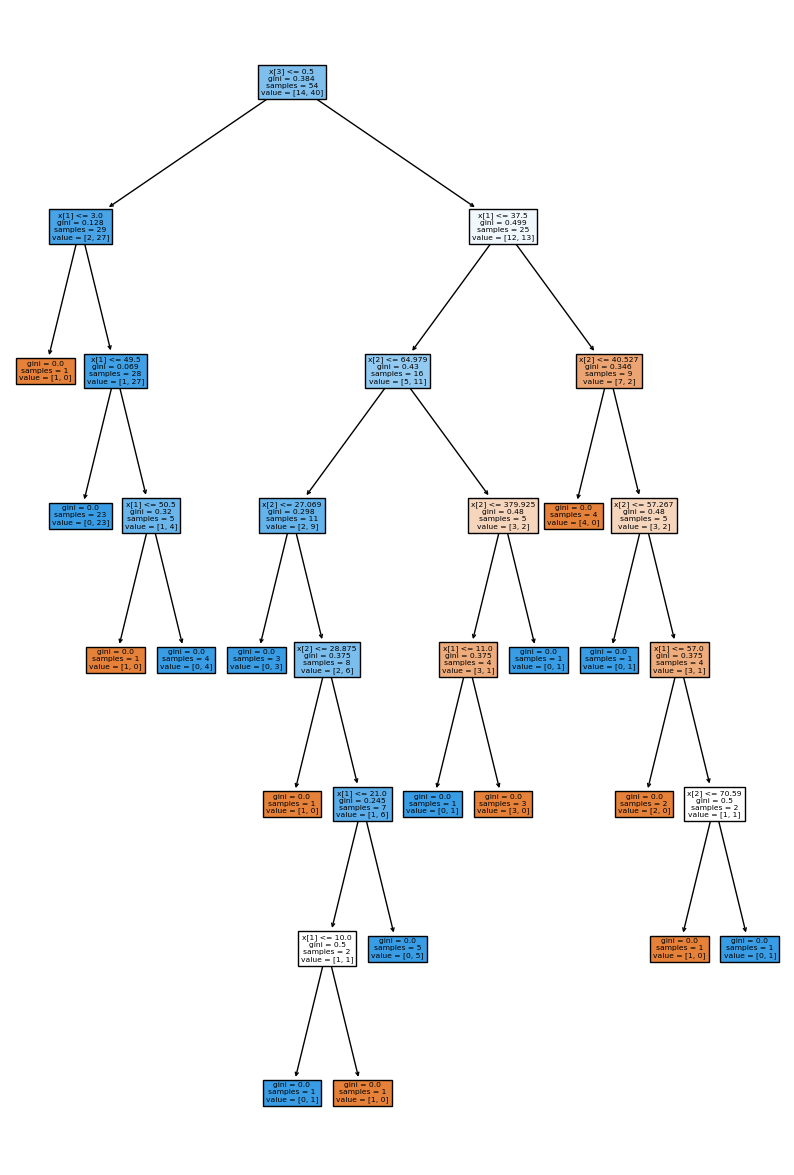

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
tree.plot_tree(model,filled=True)